In [1]:
import pandas as pd
import numpy as np
import json
from itertools import chain

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

from matplotlib.patches import Patch

import time
import glob

params = {
   'axes.labelsize': 14,
   'font.size': 14,
   'legend.fontsize': 14,
   'xtick.labelsize': 14,
   'ytick.labelsize': 14,
   'text.usetex': False,
   'figure.figsize': [4.5, 4.5],
    'savefig.facecolor':'white'
   }

mpl.rcParams.update(params)


timestr = time.strftime("%Y%m%d%H%M")

In [2]:
sol_saveat_dt = [1,1e-4][0]

print(sol_saveat_dt)

inpath = "output/"
outpath = "figures/fig2/" 

1


In [3]:
##############################################
# set to True to save fig

savefigures = True #False #True 

##############################################

In [4]:
print(len(glob.glob(inpath+"*_u.csv"))) 

190


In [5]:
input_file_ids = [i.rstrip("_u.csv") for i in glob.glob(inpath+"*_u.csv")]


In [6]:
input_file_ids = sorted(input_file_ids)

In [7]:
input_dfs = []

for fid in input_file_ids:

    dfn = fid + "_u.csv"
    tfn = fid + "_t.csv"
    nfn = fid + "_unames.csv"
    
    df = pd.read_csv(dfn,header=None)
    tf = pd.read_csv(tfn,header=None)
    nf = pd.read_csv(nfn,header=None)
    
    df.columns = [i[:-1] for i in nf[0].values.tolist() ]
    
    df['time_s'] = tf[0].copy()
    df['condition'] = fid.replace("output/sim_","").split("_extraTag",1)[0]
    
    input_dfs.append(df)
    
input_df = pd.concat(input_dfs, axis=0, ignore_index=True)

In [8]:
print(input_df.shape)

(58900, 185)


In [9]:
mets2plot2_sel3met = [i[0:-1] for i in ["Mg_x_n0","NADHmito_n0", "QH2mito_n0", "CytCredmito_n0",  
            "ATPmito_n0", "ATP_mx_n0", "ATP_i_n0", "ATP_mi_n0", 
             
            "ATP_n0", "FUMmito_n0", "MALmito_n0", "OXAmito_n0", "SUCmito_n0", "SUCCOAmito_n0", "CoAmito_n0", 
            "AKGmito_n0",  "ISOCITmito_n0", "CITmito_n0", "AcCoAmito_n0", "AcAc_n0", "AcAcCoA_n0", "PYRmito_n0", "bHB_n0", "bHB_ecs0", "bHB_b0",  "GLU_n0", 
            "NADH_n0", "Mg_x_a0",   "NADHmito_a0", "QH2mito_a0", "CytCredmito_a0",  
            "ATPmito_a0",   "ATP_mx_a0",  "ATP_i_a0",   "ATP_mi_a0",  
             
            "ATP_a0",  "FUMmito_a0", "MALmito_a0", "OXAmito_a0", "SUCmito_a0", "SUCCOAmito_a0", "CoAmito_a0", 
            "AKGmito_a0", "ISOCITmito_a0", "CITmito_a0", "AcCoAmito_a0", "PYRmito_a0", 
            "GLN_a0", "GLUT_a0", 
             
            "ddHb0", "O2cap0", 
              "Glc_b0", "Glc_t_t0", "Glc_ecsBA0", "Glc_a0", "Glc_ecsAN0", "Glc_n0", "G6P_n0", "G6P_a0", "F6P_n0", "F6P_a0", "FBP_n0", "FBP_a0", "f26bp_a0", "GLY_a0", "G1P_a0", "GAP_n0", "GAP_a0", 
              "DHAP_n0", "DHAP_a0", "BPG13_n0", "BPG13_a0", "NADH_a0", "PG3_n0", "PG3_a0", "PG2_n0", "PG2_a0", "PEP_n0", "PEP_a0", "Pyr_n0", "Pyr_a0", "Lac_b0", "Lac_ecs0", "Lac_a0", "Lac_n0", 
              "NADPH_n0", "NADPH_a0", "R5P_n0", "R5P_a0",  "E4P_n0", "E4P_a0", 
              "GSH_n0", "GSH_a0", "cAMP_a0"
]]

print(len(mets2plot2_sel3met))

94


In [10]:
all_cnds_l = input_df['condition'].unique()

group1_control = [i for i in all_cnds_l if (not i.startswith('g')) and (not i.startswith('th')) and ("_dose" not in i) 
                 ]

print(len(group1_control))



group2_GLUT1 = [i for i in all_cnds_l if ((i.startswith('g1_')) or (i.startswith('th_')))  and ("_dose" not in i) 
               ]

print(len(group2_GLUT1))


31
38


In [18]:
cnds_groups = {
    'group1_control':group1_control,
    'group2_GLUT1d':group2_GLUT1
}


In [20]:
cnds_groups_r = {}

for k,v in cnds_groups.items():
    for i in v:
        cnds_groups_r[i] = k

In [21]:
input_df_mp = input_df.loc[(input_df['time_s']>=180),:].copy()  

input_df_mp = input_df_mp.loc[(input_df_mp['condition'].isin(group1_control)) | (input_df_mp['condition'].isin(group2_GLUT1)),:].copy() 

input_df_mp['condition_grp'] = input_df_mp['condition'].map(cnds_groups_r)

input_df_mp = input_df_mp.drop(columns='condition')


input_df_mp.head(3)

,C_H_mitomatr_n,K_x_n,Mg_x_n,NADHmito_n,QH2mito_n,CytCredmito_n,O2_n,ATPmito_n,ADPmito_n,ATP_mx_n,...,PCr_a,cAMP_a,NE_neuromod,UDPgluco_a,UTP_a,GS_a,GPa_a,GPb_a,time_s,condition_grp
179,0.000018,54.885139,0.63959,0.314409,0.015754,0.132538,0.031431,0.743227,1.856773,0.206694,...,4.927256,0.039110,0.0,0.109,0.23,0.003,0.001347,0.068653,180.0,group1_control
180,0.000018,54.885139,0.63959,0.314409,0.015753,0.132538,0.031431,0.743228,1.856772,0.206695,...,4.927248,0.039110,0.0,0.109,0.23,0.003,0.001347,0.068653,181.0,group1_control
181,0.000018,54.885139,0.63959,0.314409,0.015753,0.132538,0.031431,0.743228,1.856772,0.206695,...,4.927240,0.039109,0.0,0.109,0.23,0.003,0.001347,0.068653,182.0,group1_control


In [24]:
input_df_mp_cvAmpl = pd.DataFrame(input_df_mp.groupby(["condition_grp","time_s"]).apply(lambda x: np.std(np.abs(x))/np.mean(np.abs(x)) ))

print(input_df_mp_cvAmpl.shape)

input_df_mp_cvAmpl = input_df_mp_cvAmpl.reset_index(drop=False)


input_df_mp_cvAmpl.head(3)

(262, 183)


,condition_grp,time_s,C_H_mitomatr_n,K_x_n,Mg_x_n,NADHmito_n,QH2mito_n,CytCredmito_n,O2_n,ATPmito_n,...,PCr_n,Cr_a,PCr_a,cAMP_a,NE_neuromod,UDPgluco_a,UTP_a,GS_a,GPa_a,GPb_a
0,group1_control,180.0,1.860745e-16,1.294599e-16,0.000725,0.003804,0.006408,0.002057,0.000901,0.003613,...,0.000887,5.249494e-16,0.000139,0.000381,NaN,0.0,8.447349e-16,0.0,0.009603,0.000187
1,group1_control,181.0,1.860745e-16,1.294599e-16,0.000726,0.003800,0.006424,0.002062,0.000900,0.003618,...,0.000891,5.249494e-16,0.000140,0.000381,NaN,0.0,8.447349e-16,0.0,0.009615,0.000188
2,group1_control,182.0,1.860745e-16,1.294599e-16,0.000727,0.003795,0.006439,0.002066,0.000900,0.003623,...,0.000895,5.249494e-16,0.000141,0.000382,NaN,0.0,8.447349e-16,0.0,0.009628,0.000188


In [27]:
input_df_mp_cvAmpl_l = pd.melt(input_df_mp_cvAmpl,id_vars=['time_s','condition_grp'])


In [28]:
input_df_mp_cvAmpl_l.head(3)

,time_s,condition_grp,variable,value
0,180.0,group1_control,C_H_mitomatr_n,1.860745e-16
1,181.0,group1_control,C_H_mitomatr_n,1.860745e-16
2,182.0,group1_control,C_H_mitomatr_n,1.860745e-16


In [30]:
def get_cmps_index(df):
    cmps1 = []
    for i in df['variable'].to_list():
        if len(i.split("_")) >1:
            if i.split("_")[-1] == "ecsAN0":
                cmps1.append("ecs")
            elif i.split("_")[-1] == "ecsBA0":
                cmps1.append("ecs")
            elif i.split("_")[-1] == "out0":
                cmps1.append("ecs")
            else:
                cmps1.append(i.split("_")[-1].rstrip("0"))
        else:
            #print(i)
            cmps1.append("other")
            
    return cmps1

cmps = get_cmps_index(input_df_mp_cvAmpl_l)

In [31]:
input_df_mp_cvAmpl_l['cmps'] = cmps
input_df_mp_cvAmpl_l.head(3)

,time_s,condition_grp,variable,value,cmps
0,180.0,group1_control,C_H_mitomatr_n,1.860745e-16,n
1,181.0,group1_control,C_H_mitomatr_n,1.860745e-16,n
2,182.0,group1_control,C_H_mitomatr_n,1.860745e-16,n


In [32]:
fid = '202303211313'
with open(f"data/v2function_{fid}.json","r") as f:
    v2function = json.load(f)

lut_funs = {'keto': '#a6cee3',
 'ETC': '#1f78b4',
 'TCA': '#b2df8a',
 'redox': '#33a02c',
 'ATDMP': '#fb9a99',
 'GLTGLN': '#e31a1c',
 'resp': '#fdbf6f',
 'GLCLS': '#ff7f00',
 'PPP': '#cab2d6'}

input_df_mp_cvAmpl_l['fns'] = input_df_mp_cvAmpl_l['variable'].map(v2function)

input_df_mp_cvAmpl_l.head(3)

,time_s,condition_grp,variable,value,cmps,fns
0,180.0,group1_control,C_H_mitomatr_n,1.860745e-16,n,NaN
1,181.0,group1_control,C_H_mitomatr_n,1.860745e-16,n,NaN
2,182.0,group1_control,C_H_mitomatr_n,1.860745e-16,n,NaN


In [33]:
input_df_mp_cvAmpl_l = input_df_mp_cvAmpl_l.sort_values(by=['cmps','fns'],ascending=False)

input_df_mp_cvAmpl_l.head(3)

,time_s,condition_grp,variable,value,cmps,fns
30130,180.0,group1_control,Glc_t_t,0.077604,t,GLCLS
30131,181.0,group1_control,Glc_t_t,0.077803,t,GLCLS
30132,182.0,group1_control,Glc_t_t,0.078001,t,GLCLS


In [34]:
input_df_mp_cvAmpl_l[["variable_id","variable_cmp"]] = input_df_mp_cvAmpl_l['variable'].str.split("_",1, expand=True)

In [45]:
mypal_cmps = ['#03befc','#1b5ea1','red'] 
lut_cmps = dict(zip(['n','a','b_ecs'], mypal_cmps))

In [36]:
input_df_mp_cvAmpl_l_sel = input_df_mp_cvAmpl_l.loc[input_df_mp_cvAmpl_l['variable'].isin(mets2plot2_sel3met),:].copy()

In [37]:
input_df_mp_cvAmpl_l_sel.head()

,time_s,condition_grp,variable,value,cmps,fns,variable_id,variable_cmp
30130,180.0,group1_control,Glc_t_t,0.077604,t,GLCLS,Glc,t_t
30131,181.0,group1_control,Glc_t_t,0.077803,t,GLCLS,Glc,t_t
30132,182.0,group1_control,Glc_t_t,0.078001,t,GLCLS,Glc,t_t
30133,183.0,group1_control,Glc_t_t,0.078199,t,GLCLS,Glc,t_t
30134,184.0,group1_control,Glc_t_t,0.078397,t,GLCLS,Glc,t_t


In [38]:
# remove met that are present only in one of the cell types

met_n = []
met_a = []

for i,row in input_df_mp_cvAmpl_l_sel.iterrows():
    if row['cmps'] == 'n':
        met_n.append(row['variable_id'])
    elif row['cmps'] == 'a':
        met_a.append(row['variable_id'])
        
met_na = list(set(set(met_n).intersection(met_a)))

len(met_na)

34

In [39]:
sorted(met_na)

['AKGmito',
 'ATP',
 'ATPmito',
 'AcCoAmito',
 'BPG13',
 'CITmito',
 'CoAmito',
 'CytCredmito',
 'DHAP',
 'E4P',
 'F6P',
 'FBP',
 'FUMmito',
 'G6P',
 'GAP',
 'GSH',
 'Glc',
 'ISOCITmito',
 'Lac',
 'MALmito',
 'Mg',
 'NADH',
 'NADHmito',
 'NADPH',
 'OXAmito',
 'PEP',
 'PG2',
 'PG3',
 'PYRmito',
 'Pyr',
 'QH2mito',
 'R5P',
 'SUCCOAmito',
 'SUCmito']

In [40]:
input_df_mp_cvAmpl_l_sel = input_df_mp_cvAmpl_l.loc[input_df_mp_cvAmpl_l['variable_id'].isin(met_na),:].copy()

In [41]:
input_df_mp_cvAmpl_l_sel.shape

(20960, 8)

In [42]:
input_df_mp_cvAmpl_l_sel.head(3)

,time_s,condition_grp,variable,value,cmps,fns,variable_id,variable_cmp
30130,180.0,group1_control,Glc_t_t,0.077604,t,GLCLS,Glc,t_t
30131,181.0,group1_control,Glc_t_t,0.077803,t,GLCLS,Glc,t_t
30132,182.0,group1_control,Glc_t_t,0.078001,t,GLCLS,Glc,t_t


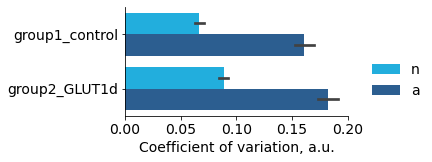

In [46]:
fig = plt.figure(figsize=(4,2))
ax = plt.subplot(111)


sns.barplot(ax=ax,
            data=input_df_mp_cvAmpl_l_sel.loc[input_df_mp_cvAmpl_l_sel['cmps'].isin(['n','a']),['value','cmps','condition_grp']], 
            x='value', y='condition_grp', 
            hue="cmps",palette=lut_cmps,orient='h', ci=95)


ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)

ax.set_ylabel("")
ax.set_xlabel("Coefficient of variation, a.u.")


ax.legend(bbox_to_anchor=(1.05, 0.6),frameon=False)

plt.show()



if savefigures == True:
    fig.savefig(outpath + "fig2b_combo_" + timestr + ".pdf",transparent=False)
    fig.savefig(outpath + "fig2b_combo_" + timestr + ".png",transparent=False, bbox_inches="tight")



In [ ]:
pd.DataFrame(input_df_mp_cvAmpl_l_sel.loc[input_df_mp_cvAmpl_l_sel['cmps'].isin(['n','a']),['value','cmps','condition_grp']].groupby(['condition_grp','cmps'])['value'].mean())


In [ ]:
pd.DataFrame(input_df_mp_cvAmpl_l_sel.loc[input_df_mp_cvAmpl_l_sel['cmps'].isin(['n','a']),['value','cmps','condition_grp']].groupby(['condition_grp','cmps'])['value'].std())